# Analysis of customers churn

### Data cleaning & Prepare data

In [9]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [10]:
df = pd.read_csv('/Users/mateusz/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.rename(columns={'Dependents':'Kids',
                   'tenure':'Tenure',
                   'gender':'Gender'},inplace=True)


df.columns = df.columns.str.strip()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Kids              7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isna().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Kids                0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:

df.head()

,customerID,Gender,SeniorCitizen,Partner,Kids,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# get distribution of values for each column
def check_the_values(x):
    for i in x:
        print('----------')
        print(df[i].value_counts())


check_the_values(df.columns)

----------
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
----------
Gender
Male      3555
Female    3488
Name: count, dtype: int64
----------
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
----------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------
Kids
No     4933
Yes    2110
Name: count, dtype: int64
----------
Tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
----------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
---

In [18]:
# Convert specific columns to numeric
column_to_change = df[['Churn','PaperlessBilling','PhoneService','Kids','Partner']]

def chenge_values(x):
    
    for i in x:
        df[i] = df[i].apply(lambda x: 1 if x == 'Yes' else 0)


chenge_values(column_to_change)

In [19]:
#Handing with missing values
df = df.loc[df['TotalCharges'] != ' ']

df['TotalCharges'] = df['TotalCharges'].str.strip( ).astype(float)

In [20]:
#Clear column Paymentmethod
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)','').str.strip( )


In [21]:
#Added new column 'Full YEar'
df['Full_Years'] = df['Tenure'] / 12
df['Full_Years'] = df['Full_Years'].apply(lambda x: math.floor(x))

In [22]:
#Create a new column which contains distribution by tenure
bins = [0,6,12,18,24,36,48,60,np.inf]
labels = ['0-6','7-12','13-18','19-24','25-36','37-48','49-60','60+']
df['Tenure_group'] = pd.cut(df['Tenure'],labels=labels,bins=bins,right=False) 

## EDA

In [23]:
df.describe()

,SeniorCitizen,Partner,Kids,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Full_Years
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,0.265785,2.289534
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,0.441782,2.016801
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000,2.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,4.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,6.000000


Procentage of left customers: 26.578498293515356


/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/3686393226.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Churn',palette='pastel',width=0.6,alpha=0.7,edgecolor='black')


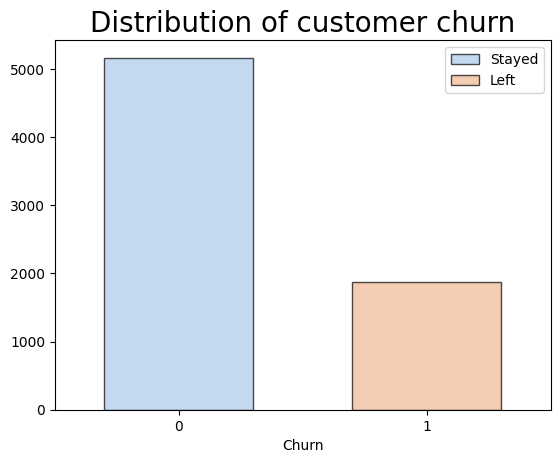

In [24]:
sns.countplot(data=df,x='Churn',palette='pastel',width=0.6,alpha=0.7,edgecolor='black')
plt.title('Distribution of customer churn',fontsize=20)
plt.ylabel(None)
plt.legend(['Stayed','Left'])

churn_rate = df['Churn'].mean() * 100
print(f'Procentage of left customers: {churn_rate}')

In [25]:
#Count percentage of Churn Customer
procentage_of_churn = round((df['Churn'].value_counts() /len(df)) *100,2)
print(f'Procentage of customer {procentage_of_churn}')

Procentage of customer Churn
0    73.42
1    26.58
Name: count, dtype: float64


/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/1506781756.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=x ,x=col,palette='pastel',width=.5,edgecolor='black')


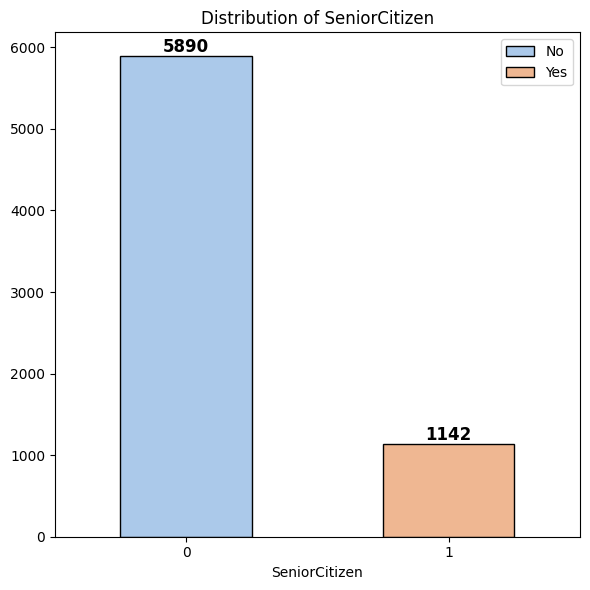

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/1506781756.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=x ,x=col,palette='pastel',width=.5,edgecolor='black')


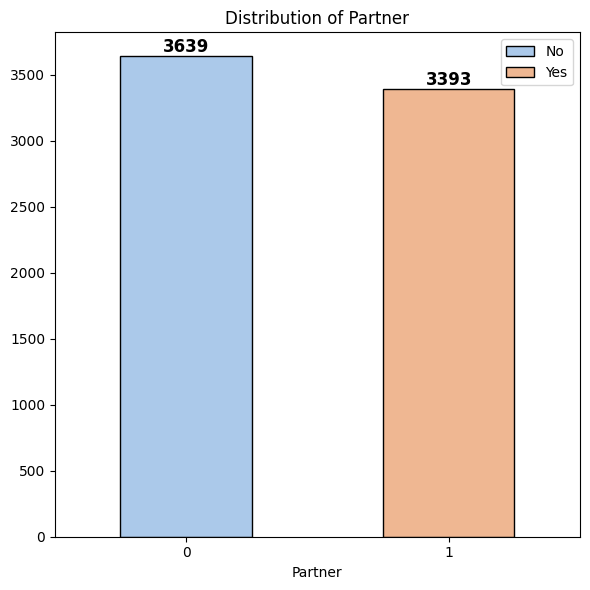

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/1506781756.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=x ,x=col,palette='pastel',width=.5,edgecolor='black')


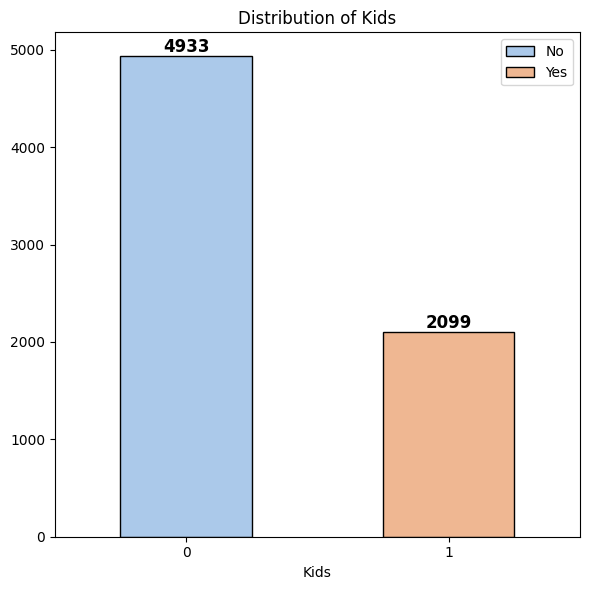

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/1506781756.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=x ,x=col,palette='pastel',width=.5,edgecolor='black')


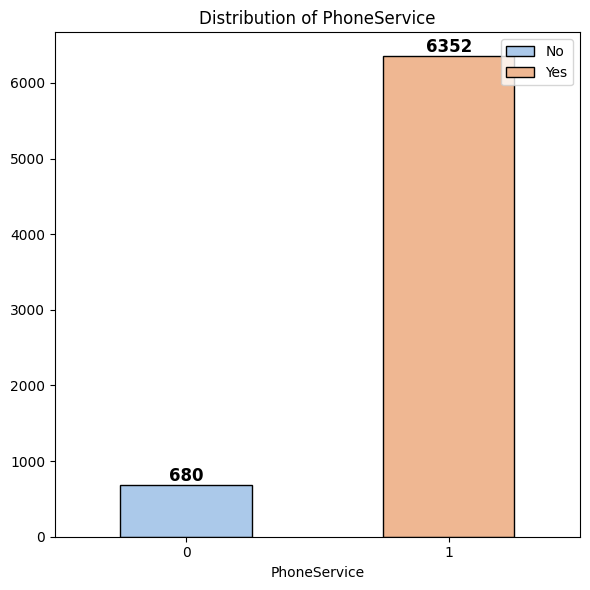

In [26]:
main_num_col = df[['SeniorCitizen','Partner','Kids','PhoneService']]

def explore_main_col(x):
    
    for col in x:
        plt.figure(figsize=(6,6))
        ax = sns.countplot(data=x ,x=col,palette='pastel',width=.5,edgecolor='black')
        
        ax.bar_label(ax.containers[0], fmt='%d', fontsize=12, fontweight='bold', label_type='edge')
        ax.bar_label(ax.containers[1], fmt='%d', fontsize=12, fontweight='bold', label_type='edge')
        
        plt.title(f'Distribution of {col}')
        plt.ylabel(None)
        plt.legend(['No','Yes'],loc='upper right')
        plt.tight_layout()
        plt.show()
        

explore_main_col(main_num_col)

In [27]:
# Count percentage of Phone service
cust_using_phoneservice = df['PhoneService'].mean() *100
print(f'{cust_using_phoneservice} of customer use Phone service ')

90.32992036405005 of customer use Phone service 


In [28]:
procentage_of_SeniorChurn = df.loc[(df['Churn'] == 1) & (df['SeniorCitizen'] == 1),'SeniorCitizen'].count() / df.loc[df['Churn'] == 1,'customerID'].count() * 100
print(f'Procentage of Senior Churn from the Total number of churn {round(procentage_of_SeniorChurn,2)}')

Procentage of Senior Churn from the Total number of churn 25.47


Text(0.5, 1.0, 'Distribution of Monthly pay')

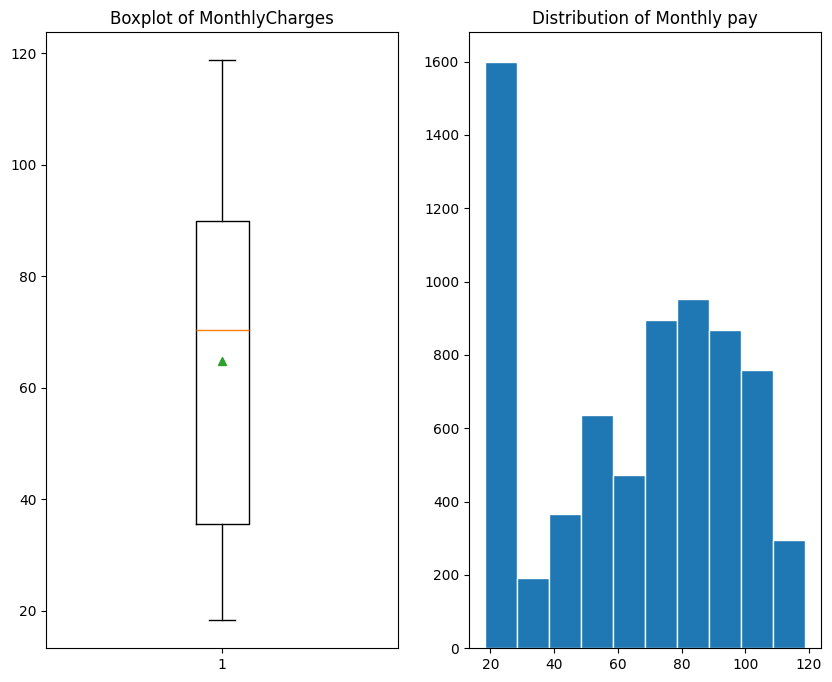

In [29]:
#Create a Distribution for numeric column 
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 8))

ax1.boxplot(data=df,x='MonthlyCharges',showmeans=True)
ax1.set_title('Boxplot of MonthlyCharges')

ax2.hist(data=df,x='MonthlyCharges',edgecolor='white')
ax2.set_title('Distribution of Monthly pay')

Text(0.5, 1.0, 'Distribution of Tenure')

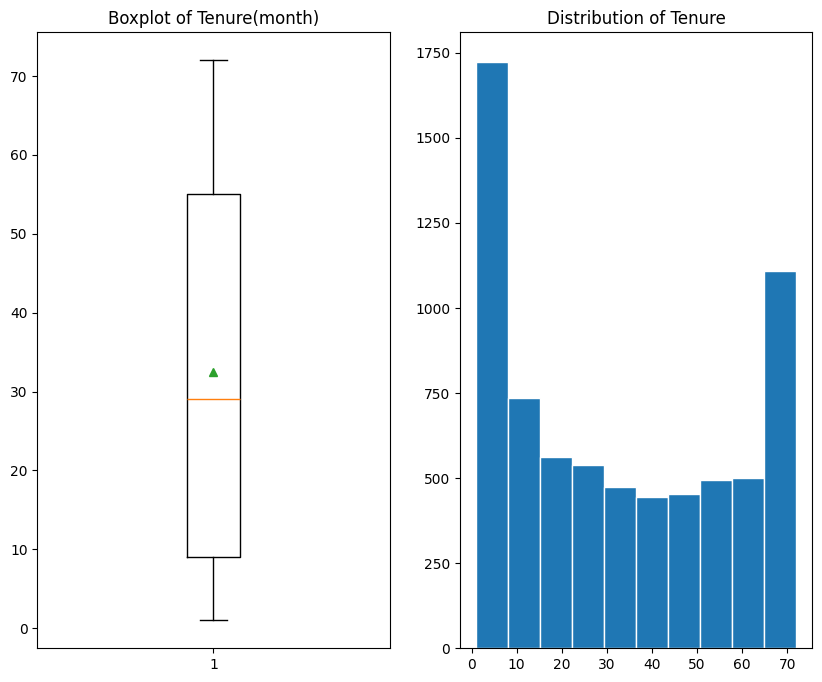

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 8))

ax1.boxplot(data=df,x='Tenure',showmeans=True)
ax1.set_title('Boxplot of Tenure(month)')

ax2.hist(data=df,x='Tenure',edgecolor='white')
ax2.set_title('Distribution of Tenure')

Text(0.5, 1.0, 'Distribution of Monthly pay')

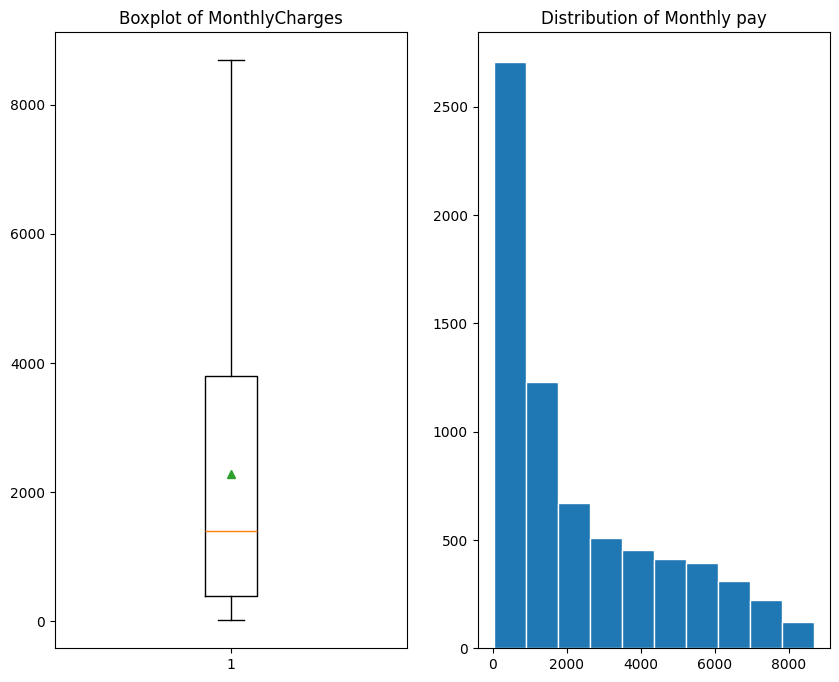

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 8))

ax1.boxplot(data=df,x='TotalCharges',showmeans=True)
ax1.set_title('Boxplot of MonthlyCharges')

ax2.hist(data=df,x='TotalCharges',edgecolor='white')
ax2.set_title('Distribution of Monthly pay')

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/847629421.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=x ,x=col,palette='pastel',width=.5,edgecolor='black')


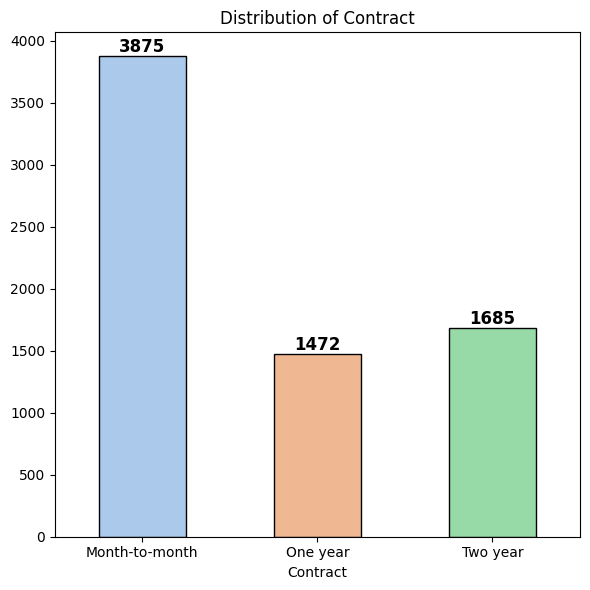

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/847629421.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=x ,x=col,palette='pastel',width=.5,edgecolor='black')


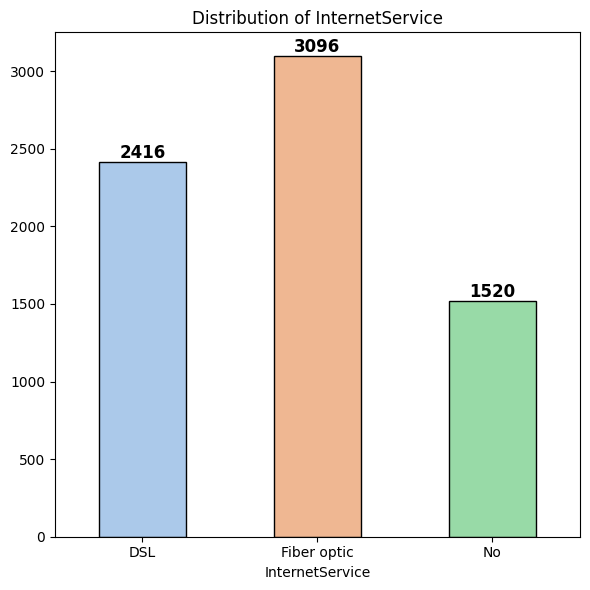

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/847629421.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=x ,x=col,palette='pastel',width=.5,edgecolor='black')


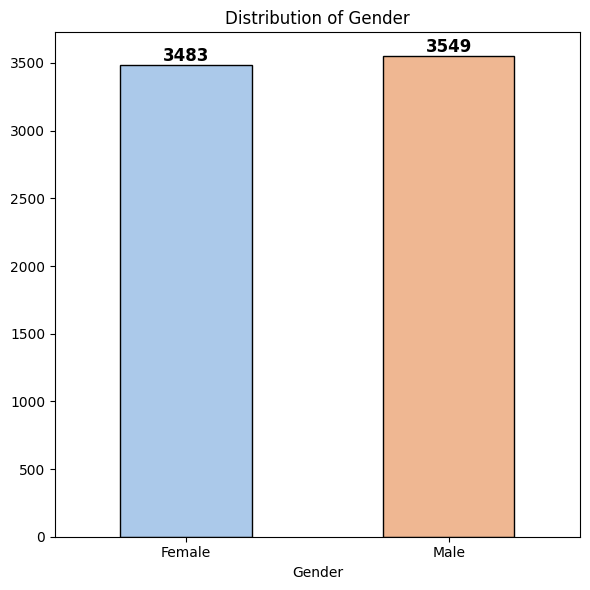

In [32]:
main_cat_col = df[['Contract','InternetService','Gender']]

def explore_main_cat_col(x):
    
    for col in x:
        plt.figure(figsize=(6,6))
        ax = sns.countplot(data=x ,x=col,palette='pastel',width=.5,edgecolor='black')
        
        for i in ax.containers:
            ax.bar_label(i, fmt='%d', fontsize=12, fontweight='bold', label_type='edge')
            
            
       
        
        plt.title(f'Distribution of {col}')
        plt.ylabel(None)
        
        plt.tight_layout()
        plt.show()
        

explore_main_cat_col(main_cat_col)

In [33]:
categorical_columns = df.select_dtypes(['object']).columns
exclude_col = ['customerID','Gender','InternetService','Contract']
categorical_columns = [i for i in categorical_columns if i not in exclude_col]


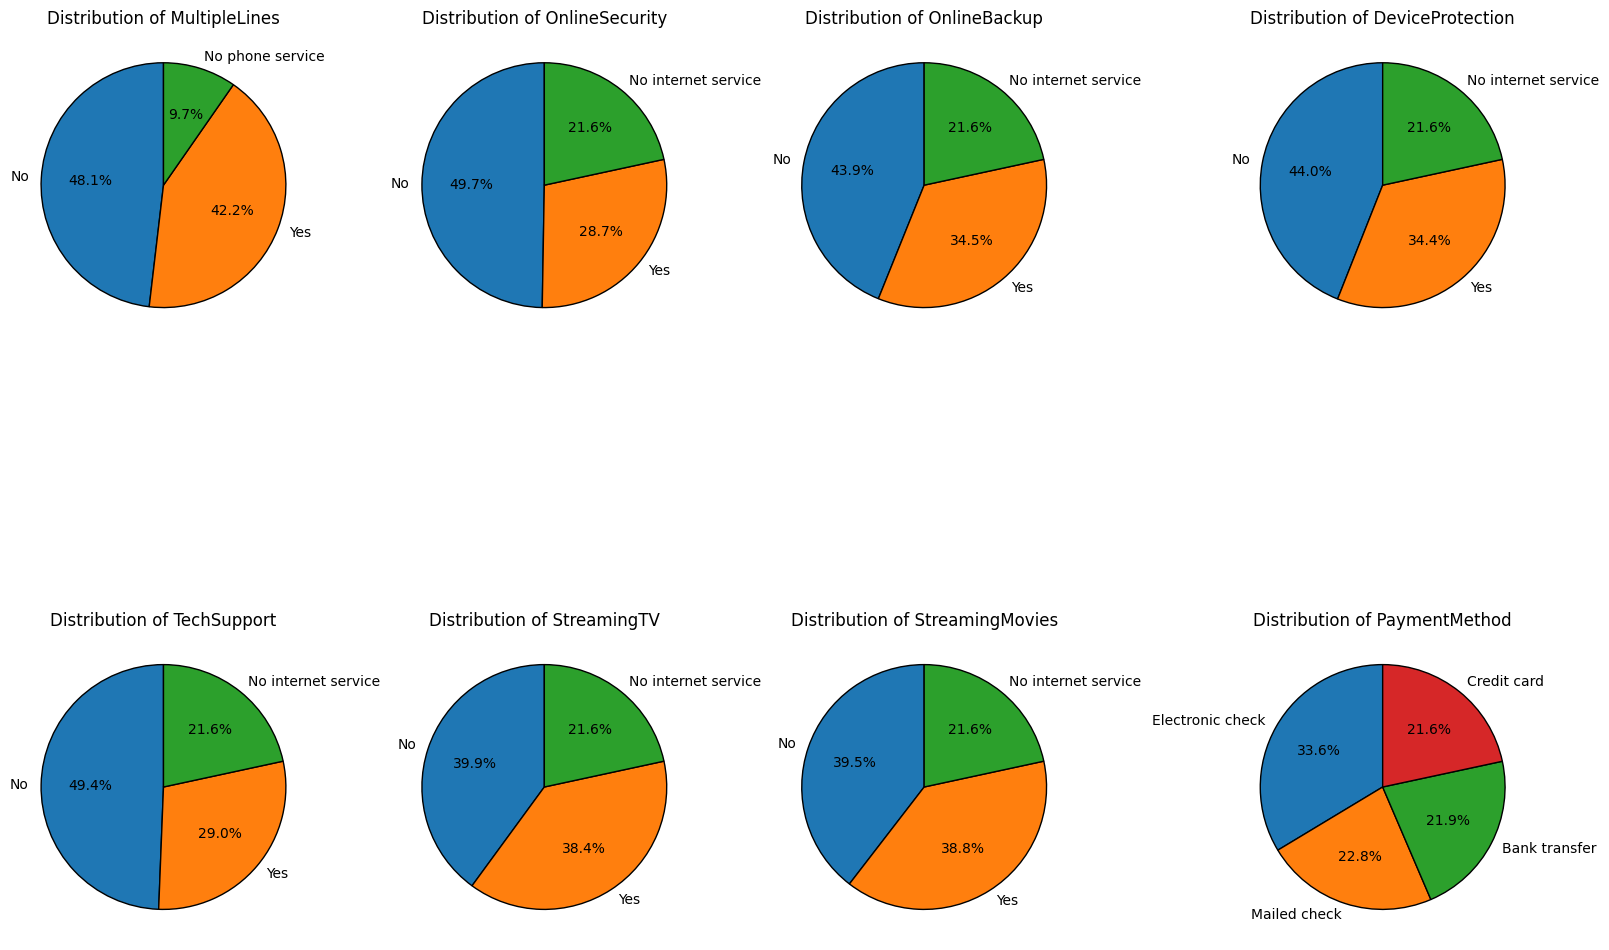

In [60]:
import matplotlib.pyplot as plt

def explore_categorical_col(x, nrow=2, ncol=4):
    fig, ax = plt.subplots(nrow, ncol, figsize=(16, 12), constrained_layout=True)
    ax = ax.flatten()
    
    colors = plt.cm.tab10.colors  

    for i, col in enumerate(x):
        counts = df[col].value_counts()
        
        

      
        ax[i].pie(counts, labels=counts.index, autopct='%1.1f%%', 
                  startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

        ax[i].set_title(f'Distribution of {col}')
    
    
    
    plt.show()


explore_categorical_col(categorical_columns)


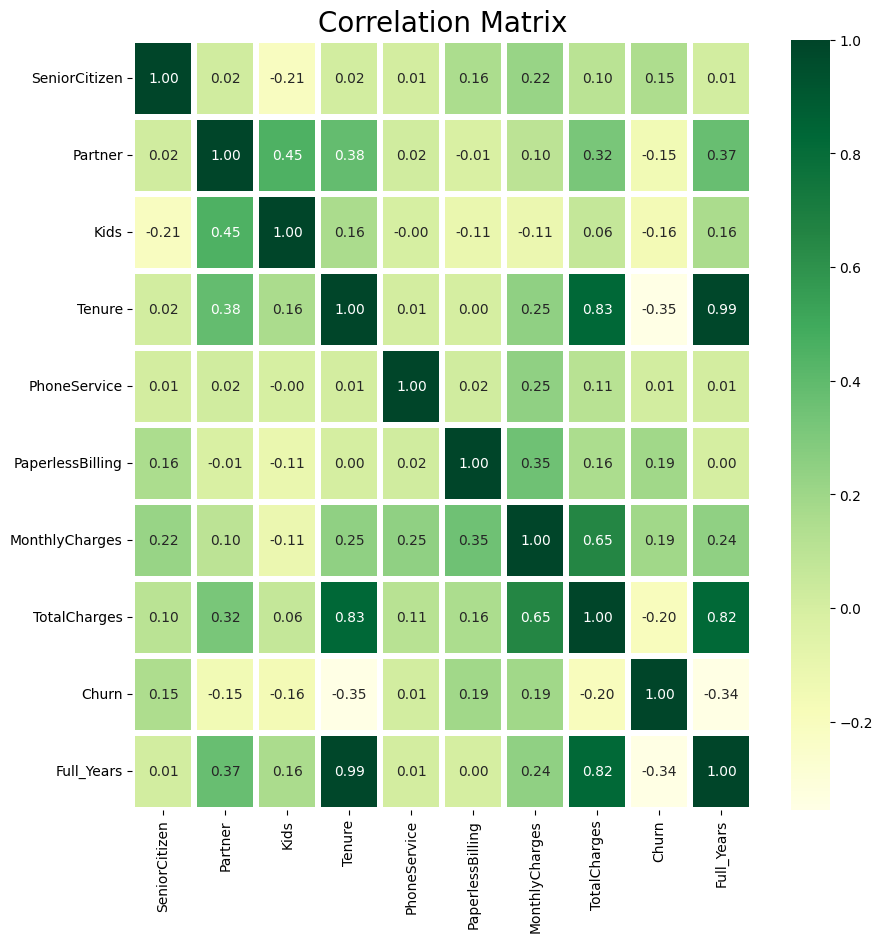

In [35]:
df_corr = df.select_dtypes(['int','float'])

corr_matrix = df_corr.corr()

plt.figure(figsize=(10,10))
sns.heatmap(data=corr_matrix,annot=True,cmap='YlGn', fmt=".2f", linewidths=4)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

In [36]:
churn_analysis = df.groupby(by='Churn')[['MonthlyCharges', 'TotalCharges']].mean()

churn_analysis

,MonthlyCharges,TotalCharges
Churn,,
0,61.307408,2555.344141
1,74.441332,1531.796094


/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/741399698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Churn', y='MonthlyCharges', palette='pastel',width=.6)


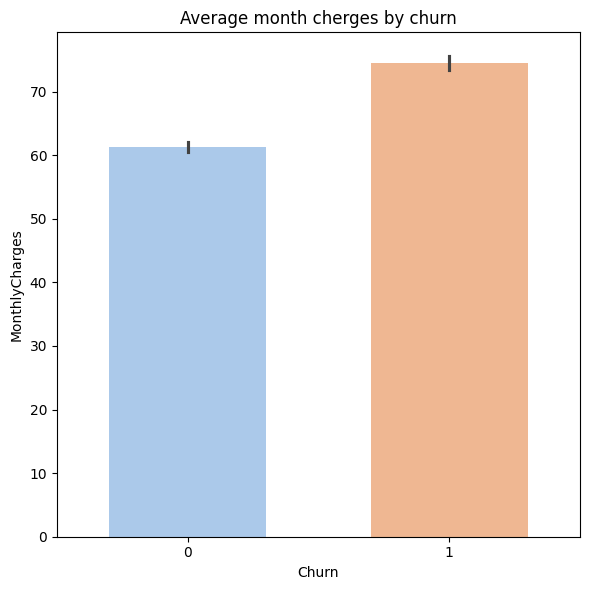

In [37]:
plt.figure(figsize=(6,6))
sns.barplot(data=df,x='Churn', y='MonthlyCharges', palette='pastel',width=.6)
plt.title('Average month cherges by churn')
plt.tight_layout()
plt.show()

### This chart show that customers who left payed more that other customers

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/2320385186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=contract_analysis,


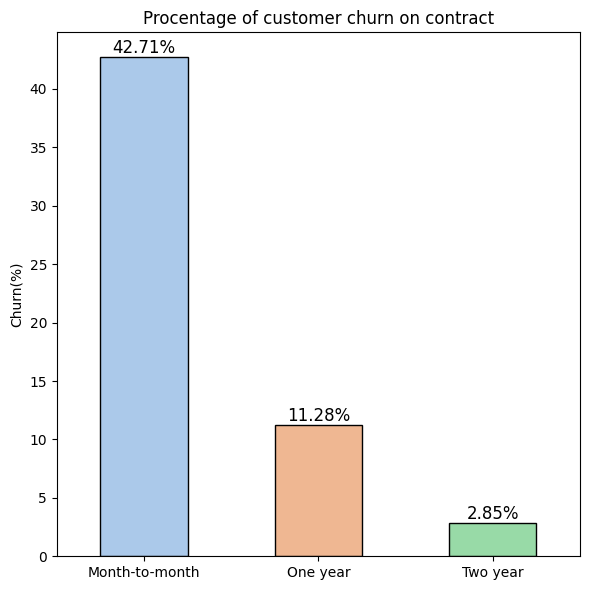

In [38]:
contract_analysis = df.groupby(by='Contract')['Churn'].mean() * 100
contract_analysis = contract_analysis.reset_index()
plt.figure(figsize=(6,6))
ax = sns.barplot(data=contract_analysis,
            x='Contract',
            y='Churn',
            palette='pastel',
            width=.5,
            edgecolor='black')

plt.title('Procentage of customer churn on contract')
plt.xlabel(None)
plt.ylabel('Churn(%)')

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', fontsize=12, fontweight='light', label_type='edge')

plt.tight_layout()
plt.show()

Customers how has month-to-month contract procentage of churn higher then oher contracts

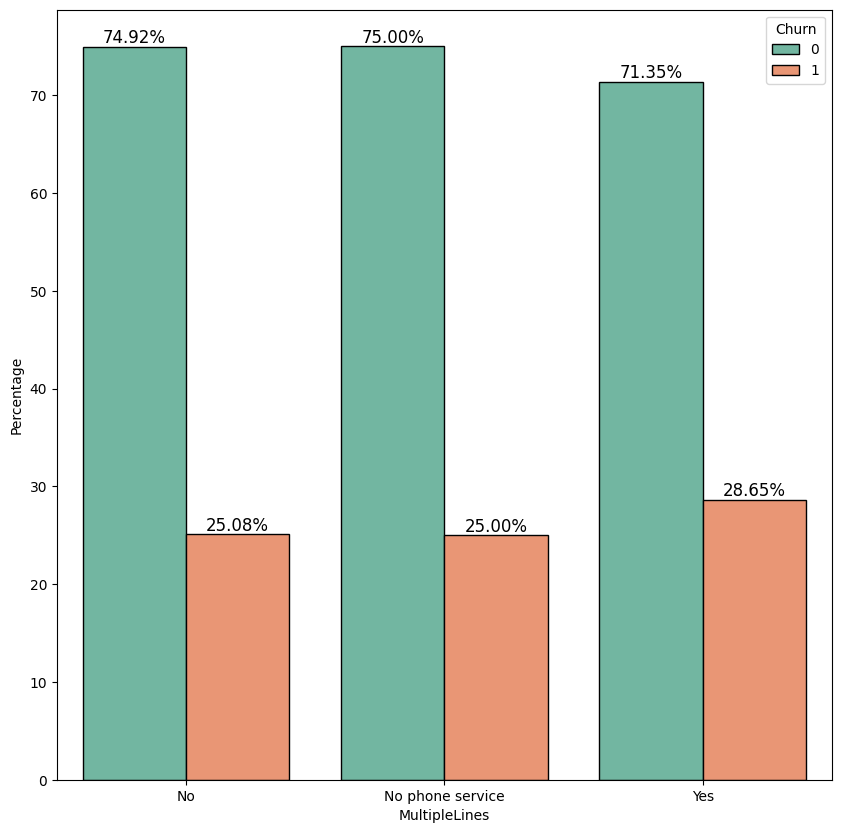

In [39]:
multiple_lines_churn = pd.crosstab(df['MultipleLines'],df['Churn'],normalize='index') * 100

multiple_lines_churn = multiple_lines_churn.reset_index()

multiple_lines_churn_melted = multiple_lines_churn.melt(id_vars='MultipleLines', var_name='Churn', value_name='Percentage')

plt.figure(figsize=(10, 10))
ax = sns.barplot(data=multiple_lines_churn_melted,
            x='MultipleLines',
            y='Percentage',
            hue='Churn',
            palette='Set2',
            edgecolor='black')

for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', fontsize=12, fontweight='light', label_type='edge')

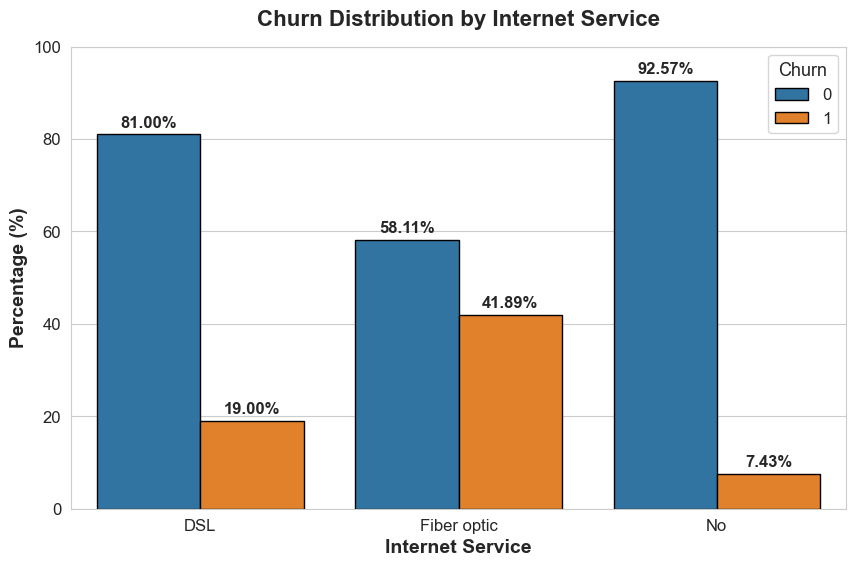

In [64]:
internet_service_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
internet_service_churn = internet_service_churn.reset_index()


internet_service_churn_melted = internet_service_churn.melt(id_vars='InternetService', var_name='Churn', value_name='Percentage')


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=internet_service_churn_melted,
    x='InternetService',
    y='Percentage',
    hue='Churn',
    palette='tab10',
    edgecolor='black'
)


for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', fontsize=12, fontweight='bold', padding=3)


ax.set_title('Churn Distribution by Internet Service', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Internet Service', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')


ax.legend(title="Churn", title_fontsize=13, fontsize=12, loc='upper right')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  
plt.show()


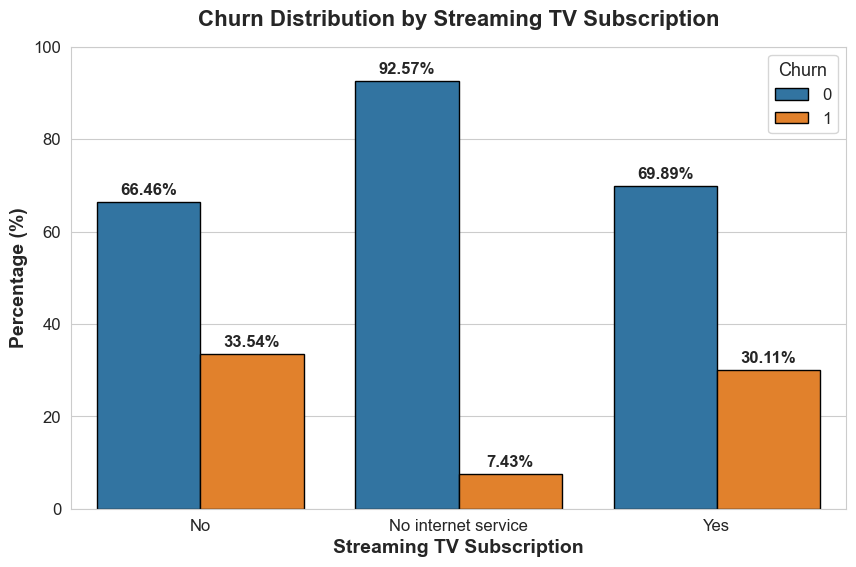

In [66]:

streaming_tv_churn = pd.crosstab(df['StreamingTV'], df['Churn'], normalize='index') * 100
streaming_tv_churn = streaming_tv_churn.reset_index()
streaming_tv_churn_melted = streaming_tv_churn.melt(id_vars='StreamingTV', var_name='Churn', value_name='Percentage')


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")


ax = sns.barplot(
    data=streaming_tv_churn_melted,
    x='StreamingTV',
    y='Percentage',
    hue='Churn',
    palette='tab10',
    edgecolor='black'
)


for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', fontsize=12, fontweight='bold', padding=3)

ax.set_title('Churn Distribution by Streaming TV Subscription', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Streaming TV Subscription', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')


ax.legend(title="Churn", title_fontsize=13, fontsize=12, loc='upper right')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  
plt.show()



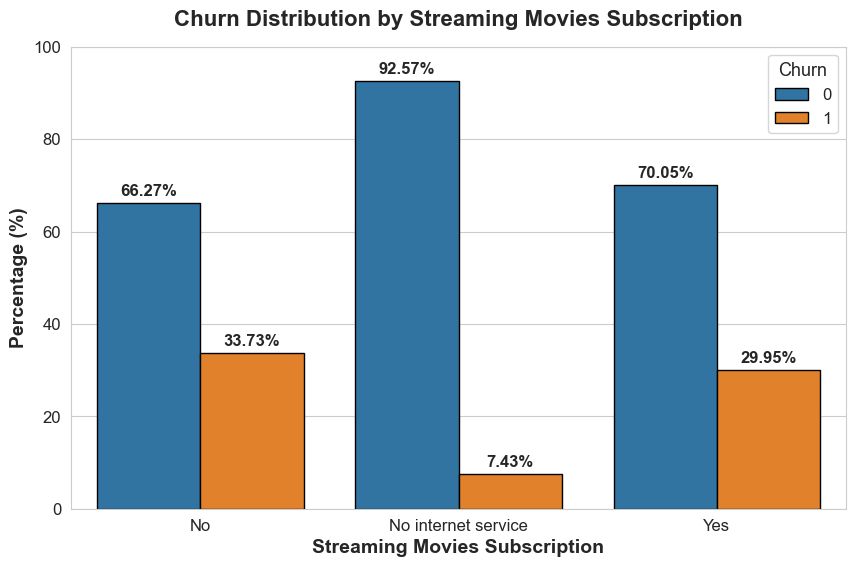

In [65]:

streaming_movie_churn = pd.crosstab(df['StreamingMovies'], df['Churn'], normalize='index') * 100
streaming_movie_churn = streaming_movie_churn.reset_index()
streaming_movie_churn_melted = streaming_movie_churn.melt(id_vars='StreamingMovies', var_name='Churn', value_name='Percentage')


plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")


ax = sns.barplot(
    data=streaming_movie_churn_melted,
    x='StreamingMovies',
    y='Percentage',
    hue='Churn',
    palette='tab10',
    edgecolor='black'
)

# Add percentage labels on bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%', fontsize=12, fontweight='bold', padding=3)


ax.set_title('Churn Distribution by Streaming Movies Subscription', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Streaming Movies Subscription', fontsize=14, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=14, fontweight='bold')


ax.legend(title="Churn", title_fontsize=13, fontsize=12, loc='upper right')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 100)  
plt.show()



# Advanced Statistical Analysis

## Main Hypothesis:
Chi-Square
* Contract Type & Churn
* Internet Service Type & Churn
* Additional Services (Streaming, Security, Tech Support) & Churn
* Multiple Lines & Churn
---------------
t-test,Anova
* Monthly Charges & Churn
* Tenure & Churn
----------------
Regression analysis
* To check which factors consistently influence churn, run a logistic regression model


In [43]:
from scipy.stats import chi2_contingency,ttest_ind,f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Contract Type & Churn
* H0 - the type of contract doesn't impact churn
* H1 - contract type signififcantly affects churn

In [44]:
contig_table=pd.crosstab(df['Contract'],df['Churn'])
contig_table
chi2,p,dof,excepted = chi2_contingency(contig_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("Reject the null hypothesis: ")
else:
    print("Fail to reject the null hypothesis: ")

Chi-Square Statistic: 1179.5458287339445
P-value: 7.326182186265472e-257
Reject the null hypothesis: 


### The contract type have very significant relationship with Churn

# Internet Service Type & Churn
* H0 - Internet Service type does not affect churn
* H1 - Internet Type  affects churn

In [45]:
contig_table = pd.crosstab(df['InternetService'],df['Churn'])
contig_table

chi2,p,dof,excepted = chi2_contingency(contig_table)
print(f'Chi-Square Statistic: {chi2}')
print(f'p_value: {p}')
if p < 0.05:
    print("Reject the null hypothesis: ")
else:
    print("Fail to reject the null hypothesis: ")

Chi-Square Statistic: 728.6956143058694
p_value: 5.831198962237274e-159
Reject the null hypothesis: 


In [46]:
internet_churn_rates = round(df.groupby('InternetService')['Churn'].mean() * 100,2)
print(internet_churn_rates)

InternetService
DSL            19.00
Fiber optic    41.89
No              7.43
Name: Churn, dtype: float64


## Additional Services (Streaming, Security, Tech Support) & Churn
* H0 - Having additional Servoce does not affect churn
* H1 - Addition Service significant affect churn

In [47]:
features = ['StreamingTV','StreamingMovies','MultipleLines']

chi2_results = {}

for i in features:
    contig_table = pd.crosstab(df[i],df['Churn'])
    chi2,p,dof,expected = chi2_contingency(contig_table)
    chi2_results[i] = {'Chi-Square': chi2,
                       'p-value': p}
    
chi2_df = pd.DataFrame(chi2_results).T
print(chi2_df)

                 Chi-Square       p-value
StreamingTV      372.456502  1.324641e-81
StreamingMovies  374.268432  5.353560e-82
MultipleLines     11.271541  3.567927e-03


There are factors significant affect churn,
* the most are Streaming Service and Multiplelines has low affect then Streaming Services 

## Monthly Charges & Churn
* H0 - The average monthly charges are the same for  churned and non-churned customers.
* H1 - Customer who churn have higher monthly charges

In [48]:
churn = df[df['Churn'] == 1]['MonthlyCharges']
no_churn = df[df['Churn'] == 0]['MonthlyCharges']

t_stat,p_value = ttest_ind(churn,no_churn)
print(f'T-statistic: {t_stat}')
print(f'p-value: {p_value}')


T-statistic: 16.47959313114872
p-value: 6.760843117980302e-60


This suggests that monthly spend does have a significant impact on the likelihood of a customer leaving.

## Tenure group & Churn
* H0 - The average tenure is the same for churned and non-churned customers.
* H1 -  Churned customers have a significantly shorter tenure.

In [49]:
f_stat,p_value = f_oneway(
    df[df['Tenure_group'] == '0-6']['Churn'],
    df[df['Tenure_group'] == '7-12']['Churn'],
    df[df['Tenure_group'] == '13-18']['Churn'],
    df[df['Tenure_group'] == '19-24']['Churn'],
    df[df['Tenure_group'] == '25-36']['Churn'],
    df[df['Tenure_group'] == '37-48']['Churn'],
    df[df['Tenure_group'] == '49-60']['Churn'],
    df[df['Tenure_group'] == '60+']['Churn']
)

print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')

F-statistic: 164.0194295445384
p-value: 1.9773496129371774e-225


In [50]:
df_filtered = df[df.groupby('Tenure_group')['Churn'].transform('nunique') > 1]

tukey = pairwise_tukeyhsd(df_filtered['Churn'],df_filtered['Tenure_group'],alpha=.05)

print(tukey.summary())

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/2790720127.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filtered = df[df.groupby('Tenure_group')['Churn'].transform('nunique') > 1]


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0-6  13-18  -0.2108    0.0 -0.2729 -0.1487   True
   0-6  19-24  -0.3007    0.0 -0.3667 -0.2347   True
   0-6  25-36  -0.3267    0.0 -0.3806 -0.2729   True
   0-6  37-48  -0.3519    0.0 -0.4084 -0.2953   True
   0-6  49-60  -0.3971    0.0  -0.452 -0.3421   True
   0-6    60+  -0.4803    0.0 -0.5269 -0.4337   True
   0-6   7-12  -0.1817    0.0 -0.2396 -0.1239   True
 13-18  19-24  -0.0899 0.0097  -0.167 -0.0129   True
 13-18  25-36  -0.1159    0.0 -0.1829  -0.049   True
 13-18  37-48  -0.1411    0.0 -0.2102 -0.0719   True
 13-18  49-60  -0.1863    0.0 -0.2541 -0.1184   True
 13-18    60+  -0.2695    0.0 -0.3308 -0.2082   True
 13-18   7-12   0.0291 0.9151 -0.0411  0.0993  False
 19-24  25-36   -0.026 0.9532 -0.0966  0.0446  False
 19-24  37-48  -0.0512 0.3933 -0.1239  0.0215  False
 19-24  49-60  -0.0963 0.0011 -0.1678 -0.0249 

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_38294/2221459876.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_tenure,


<Axes: xlabel='Tenure_group', ylabel='count'>

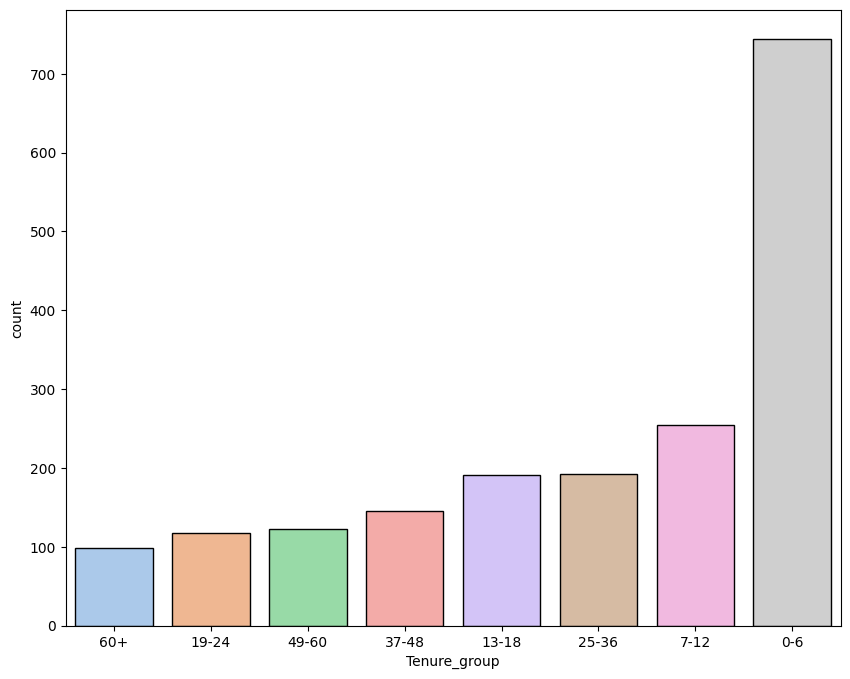

In [51]:
total_tenure = df[df['Churn'] == 1]['Tenure_group'].value_counts().reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=total_tenure,
            x='Tenure_group',
            y='count',
            palette='pastel',
            edgecolor='black',
            order=total_tenure['Tenure_group'][::-1])

In [52]:
new_cust = df[df['Tenure_group'] == '0-6']['MonthlyCharges']
old_cust = df[df['Tenure_group'] == '60+']['MonthlyCharges']

t_stat,p_value = ttest_ind(old_cust,new_cust)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: 19.41137223890308
P-value: 6.423075658505239e-79


### Regression analysis

In [ ]:

df_1 = df.copy()

# One-hot encoding
df_1 = pd.get_dummies(df_1, columns=['Contract', 'InternetService', 'StreamingTV', 'StreamingMovies', 'MultipleLines'])


df_1.drop(columns=['InternetService_No', 'Contract_Two year'], inplace=True)


features = [
    'SeniorCitizen', 'Kids', 'PhoneService', 'MonthlyCharges', 'Tenure',
    'Contract_Month-to-month', 'Contract_One year',  
    'InternetService_DSL', 'InternetService_Fiber optic',  
    'StreamingTV_Yes', 'StreamingMovies_Yes', 'MultipleLines_Yes'
]


X = df_1[features]
X = X.astype(int)


X = sm.add_constant(X)


y = df_1['Churn']
model = sm.Logit(y, X).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.420523
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7019
Method:                           MLE   Df Model:                           12
Date:                Sun, 16 Feb 2025   Pseudo R-squ.:                  0.2737
Time:                        13:11:50   Log-Likelihood:                -2957.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.2870      0.231     -9.887      0.000   

In [54]:
np.exp(model.params)


const                           0.101574
SeniorCitizen                   1.319115
Kids                            0.827877
PhoneService                    1.318759
MonthlyCharges                  0.959195
Tenure                          0.966007
Contract_Month-to-month         4.410878
Contract_One year               2.096003
InternetService_DSL             6.925522
InternetService_Fiber optic    56.397024
StreamingTV_Yes                 2.124478
StreamingMovies_Yes             2.122830
MultipleLines_Yes               1.714124
dtype: float64

In [ ]:
from sklearn.metrics import roc_auc_score


y_pred_proba = model.predict(X)  

# Calculate a AUC
auc = roc_auc_score(y, y_pred_proba)
print(f"AUC-ROC: {auc}")


AUC-ROC: 0.8420534450638453


## Conclusion:
* From the Analysis of customer churn, it appears that approximately <span style="color:red">27%</span> of customers have stopped using the service.
* <span style="color:red">25%</span> of all customer churn is attributable to seniors
* Customers who use phone service is <span style="color:green">90%</span>
* Avearge monthly pay  is <span style="color:green">65$</span>
* The most preferred contract type is <span style="color:green">month-to-month</span>
* Most customers choose the <span style="color:green">Fiber optic</span>
* Customer who left paid more than customer who stay with company
* The majority of customer churn occurred on "month-to-month" contracts.The second place - "One year" contract
-----------------
* Customers with a <span style="color:red">month-to-month</span> contract  were significantly more likely to leave than those who chose a long-term contract.Customers with <span style="color:red">annual</span> contracts are also subject to churn, but less than monthly customers.
    * This confirms that long-term contracts reduce the likelihood of churn.

* Customers with <span style="color:red">fiber internet</span> are more likely to leave than those without internet.<span style="color:red">DSL</span> users  are also subject to churn, but less than fiber users.
    * This could be due to internet quality issues or fiber optic pricing.

* The MonthlyCharges coefficient , indicates that the <span style="color:red">higher</span> the amount, the more likely to leave.
    * customers who left paid more on average.

* <span style="color:red">new customers</span> are more likely to leave and loyal users are more likely to stay.

* Customers who have <span style="color:red">Streaming TV</span> and <span style="color:red">Streaming Movies</span> are more likely to leave.
    * This may indicate that these services are not adding enough value to retain customers.

* <span style="color:red">Older customers</span> are more likely to leave, possibly due to dissatisfaction with service

* Having <span style="color:green">children</span> reduces the likelihood of churn

In [56]:
df.to_csv('Customer_churn.csv',index=False)